##Katarzyna Klęczek student number 2059098

In [1]:
# import the required modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import warnings 

# A. Classification with Numerical Data

## Task 1

Load the train and test dataset, cover train numerical.csv and cover test numerical.csv. Create a feature set without ‘label‘. (For train data, assign all the data except the column ‘label‘ to
“X train”. For test data, assign all the data except the columns “label” to “X test”) Assign the ‘label”
as a target variable. (For train data, assign the column “label” to “y train”. For test data, assign the
column “label” to “y test”)

In [2]:
###loading the dataset
cover_train_numerical = pd.read_csv("cover_train_numerical.csv")
cover_test_numerical = pd.read_csv("cover_test_numerical.csv")

###creating the feature sets
columns = np.array(list(cover_train_numerical.columns)) # array with column names
print(columns)
#last column is the label one so we add all columns exept the last one
X_train = cover_train_numerical[columns[:-1]]
y_train = cover_train_numerical[columns[-1]]

###creating your target variable
X_test = cover_test_numerical[columns[:-1]]
y_test = cover_test_numerical[columns[-1]]

['dimension-x' 'dimension-y' 'dimension-z' 'weight' 'length' 'r_mean'
 'g_mean' 'b_mean' 'r_var' 'g_var' 'b_var' 'label']


## Task 2

Display a histogram plot of the target variable. Visualize each feature in “X train” in a
separate histogram plot.

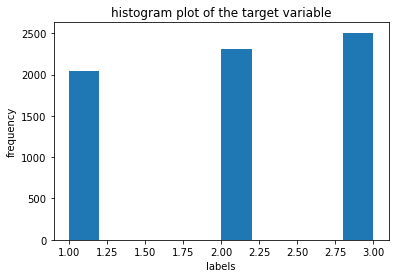

In [3]:
###displaying a histogram plot of the target variable
labels = np.array([])
for i in y_train:
    labels = np.append(labels, i)
for j in y_test:
    labels = np.append(labels, j)
plt.hist(labels)
plt.title("histogram plot of the target variable")
plt.xlabel("labels")
plt.ylabel("frequency")
plt.show()

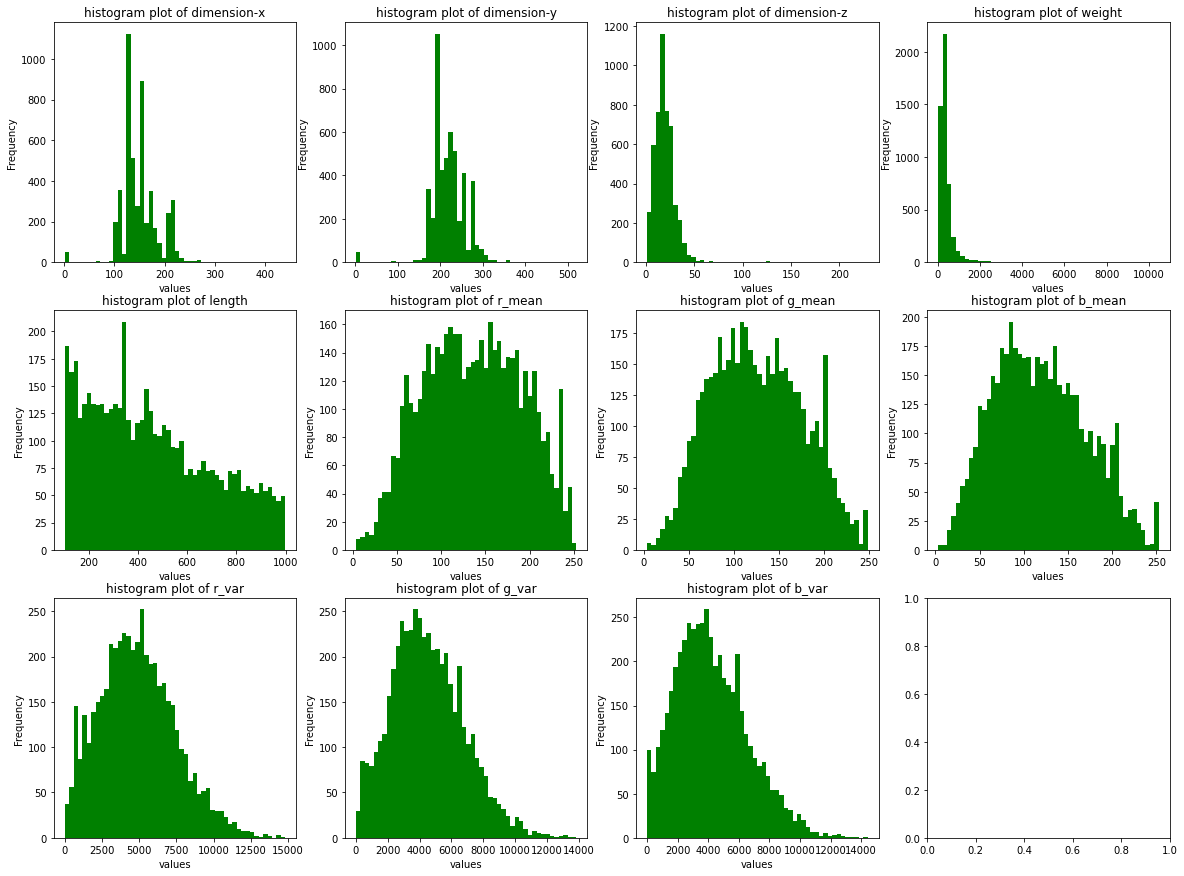

In [4]:
###displaying the histogram plot of each feature in “X train”
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
ax = axes.ravel()
for feat in range(len(columns)-1):
    feature = np.array([])
    for i in cover_train_numerical[columns[feat]]:
        feature = np.append(feature, i)
    ax[feat].hist(feature, bins=50, color='g')
    ax[feat].set_title("histogram plot of {}".format(columns[feat]))
    ax[feat].set_xlabel("values")
    ax[feat].set_ylabel("Frequency")


## Task 3

Using GridSearchCV, train a Logistic Regression classifier with a 5-fold cross validation.
Find the best regularization (C) hyperparameter with 5 different C values. Using the best hyperparameter found from grid search, evaluate the accuracy, weighted F1-score and confusion matrix on the train
and test set.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### Logistic Regression

In [6]:
cs=[0.001, 0.01, 0.1, 1, 100]

In [7]:
### evaluating a Logistic Regression classifier without Grid Search and Cross Validation
for c in cs:
    lr=LogisticRegression(C=c, max_iter=10000).fit(X_train, y_train)
    print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
    print("Test set score: {:.3f}".format(lr.score(X_test, y_test)))

Training set score: 0.651
Test set score: 0.643
Training set score: 0.652
Test set score: 0.643
Training set score: 0.652
Test set score: 0.643
Training set score: 0.652
Test set score: 0.643
Training set score: 0.652
Test set score: 0.643


In [8]:
### GridSearchCV with the correct number of folds
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
lr=LogisticRegression(max_iter=10000)
param_grid = {"C": cs}
grid_search = GridSearchCV(lr, param_grid, cv=kfold)
grid_search.fit(X_train, y_train)
lr1best_parameter=grid_search.best_params_
print("Best parameters: {}".format(grid_search.best_params_))
#Accuracy score?
lr1score=grid_search.best_score_
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1}
Best cross-validation score: 0.65


In [9]:
### confusion matrix
lr=LogisticRegression(C=list(lr1best_parameter.values())[0], max_iter=10000).fit(X_train, y_train)
pred_logreg = lr.predict(X_test)
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix test set :\n{}".format(confusion))


Confusion matrix test set :
[[219 244 126]
 [183 407  44]
 [ 43  39 595]]


In [10]:
### weighted F1-score
lr1_f1_test=f1_score(y_test,pred_logreg, average="weighted")
print("F1 score:\n{}".format(f1_score(y_test,pred_logreg, average="weighted")))

F1 score:
0.6305125535577827


In [11]:
#confusion matrix and F1 score for train set
pred_logreg = lr.predict(X_train)
confusion = confusion_matrix(y_train, pred_logreg)
print("Confusion matrix train set:\n{}\n".format(confusion))
lr1_f1_train=f1_score(y_train,pred_logreg, average="weighted")
print("F1 score:\n{}".format(f1_score(y_train,pred_logreg, average="weighted")))

Confusion matrix train set:
[[ 495  623  331]
 [ 416 1156  101]
 [ 121  130 1578]]

F1 score:
0.638585378200193


## Task 4

Using GridSearchCV, Try with two other low-level classifiers (e.g. Decision Trees, SVM,
Naive Bayes, MLP, KNN) of your choice with grid search and cross validation. Choose one or two
hyperparameters (if any) to search for. Using the best hyperparameters found from grid search, evaluate
the accuracy, weighted F1-score and confusion matrix on the training and test set.

### Decision Trees

In [12]:
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
depths=[1,3,5,10,15]
param_grid = {"max_depth": depths}
grid_search = GridSearchCV(tree, param_grid, cv=kfold)
grid_search.fit(X_train, y_train)
tree1best_parameter=grid_search.best_params_
print("Best parameters: {}".format(grid_search.best_params_))
#Accuracy score?
tree1score=grid_search.best_score_
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 10}
Best cross-validation score: 0.80


In [13]:
#for test sets
pred_tree_test = tree.predict(X_test)
#accuracy and weighted F1-score
tree1_f1_test=f1_score(y_test,pred_tree_test, average="weighted")
print("F1 score: {}\n".format(f1_score(y_test,pred_tree_test, average="weighted")))
#confusion matrix
confusion = confusion_matrix(y_test, pred_tree_test)
print("Confusion matrix train set:\n{}".format(confusion))

F1 score: 0.7532181074230874

Confusion matrix train set:
[[416 140  33]
 [123 447  64]
 [ 39  71 567]]


In [14]:
### for train sets
pred_tree_train = tree.predict(X_train)
#accuracy and weighted F1-score
tree1_f1_train=f1_score(y_train,pred_tree_train, average="weighted")
print("F1 score: {}\n".format(f1_score(y_train,pred_tree_train, average="weighted")))
#confusion matrix
confusion = confusion_matrix(y_train, pred_tree_train)
print("Confusion matrix train set:\n{}".format(confusion))

F1 score: 1.0

Confusion matrix train set:
[[1449    0    0]
 [   0 1673    0]
 [   0    0 1829]]


### MLP

In [15]:
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
mlp=MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
layers=[2,5,10,25,50]
alphas=[0.0001, 0.01, 0.1, 1, 10]
param_grid = {"hidden_layer_sizes": layers, "alpha": alphas}
grid_search = GridSearchCV(mlp, param_grid, cv=kfold)
grid_search.fit(X_train, y_train)
MLP1best_parameter=grid_search.best_params_
print("Best parameters: {}".format(grid_search.best_params_))
#Accuracy score?
MLP1score=grid_search.best_score_
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1, 'hidden_layer_sizes': 25}
Best cross-validation score: 0.61


In [16]:
#for test sets
pred_mlp_test = mlp.predict(X_test)
#accuracy and weighted F1-score
mlp1_f1_test=f1_score(y_test,pred_mlp_test, average="weighted")
print("F1 score: {}\n".format(f1_score(y_test,pred_mlp_test, average="weighted")))
#confusion matrix
confusion = confusion_matrix(y_test, pred_mlp_test)
print("Confusion matrix train set:\n{}".format(confusion))

F1 score: 0.5240016728837744

Confusion matrix train set:
[[ 61 396 132]
 [ 68 486  80]
 [ 14 111 552]]


In [17]:
### for train sets
pred_mlp_train = mlp.predict(X_train)
#accuracy and weighted F1-score
mlp1_f1_train=f1_score(y_train,pred_mlp_train, average="weighted")
print("F1 score: {}\n".format(f1_score(y_train,pred_mlp_train, average="weighted")))
#confusion matrix
confusion = confusion_matrix(y_train, pred_mlp_train)
print("Confusion matrix train set:\n{}".format(confusion))

F1 score: 0.5409435089950684

Confusion matrix train set:
[[ 128  956  365]
 [ 134 1359  180]
 [  34  310 1485]]


## Task 5

Try a Random Forest and Gradient Boosting classifier with GridSearchCV. Choose one
hyperparameter to search for with a minimum of 5 different values. Evaluate the accuracy, weighted
F1-score and confusion matrix on the training and test set.

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
estimators=[5,10,15,50,100]
param_grid = {"n_estimators": estimators}
grid_search = GridSearchCV(forest, param_grid, cv=kfold)
grid_search.fit(X_train, y_train)
forest1best_parameter=grid_search.best_params_
print("Best parameters: {}".format(grid_search.best_params_))
#Accuracy score?
forest1score=grid_search.best_score_
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_estimators': 100}
Best cross-validation score: 0.85


In [19]:
#for test sets
pred_forest_test = forest.predict(X_test)
#accuracy and weighted F1-score
forest1_f1_test=f1_score(y_test,pred_forest_test, average="weighted")
print("F1 score: {}\n".format(f1_score(y_test,pred_forest_test, average="weighted")))
#confusion matrix
confusion = confusion_matrix(y_test, pred_forest_test)
print("Confusion matrix train set:\n{}".format(confusion))

F1 score: 0.8117326723486679

Confusion matrix train set:
[[436 130  23]
 [ 85 501  48]
 [ 21  51 605]]


In [20]:
# for train sets
pred_forest_train = forest.predict(X_train)
#accuracy and weighted F1-score
forest1_f1_train=f1_score(y_train,pred_forest_train, average="weighted")
print("F1 score: {}\n".format(f1_score(y_train,pred_forest_train, average="weighted")))
#confusion matrix
confusion = confusion_matrix(y_train, pred_forest_train)
print("Confusion matrix train set:\n{}".format(confusion))

F1 score: 1.0

Confusion matrix train set:
[[1449    0    0]
 [   0 1673    0]
 [   0    0 1829]]


### Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
estimators=[5,10,15,50,100]
param_grid = {"n_estimators": estimators}
grid_search = GridSearchCV(gbrt, param_grid, cv=kfold)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
#Accuracy score?
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_estimators': 100}
Best cross-validation score: 0.85


In [22]:
gradient1best_parameter=grid_search.best_params_
gradient1score=grid_search.best_score_

In [23]:
#for test sets
pred_gbrt_test = gbrt.predict(X_test)
#accuracy and weighted F1-score
gradient1_f1_test=f1_score(y_test,pred_gbrt_test, average="weighted")
print("F1 score: {}\n".format(f1_score(y_test,pred_gbrt_test, average="weighted")))
#confusion matrix
confusion = confusion_matrix(y_test, pred_gbrt_test)
print("Confusion matrix train set:\n{}".format(confusion))

F1 score: 0.8294272074393281

Confusion matrix train set:
[[457 115  17]
 [ 84 510  40]
 [ 22  47 608]]


In [24]:
# for train sets
pred_gbrt_train = gbrt.predict(X_train)
#accuracy and weighted F1-score
gradient1_f1_train=f1_score(y_train,pred_gbrt_train, average="weighted")
print("F1 score: {}\n".format(f1_score(y_train,pred_gbrt_train, average="weighted")))
#confusion matrix
confusion = confusion_matrix(y_train, pred_gbrt_train)
print("Confusion matrix train set:\n{}".format(confusion))

F1 score: 0.8938237574941755

Confusion matrix train set:
[[1231  177   41]
 [ 106 1483   84]
 [  21   97 1711]]


## Task 6

Display the feature importance of Random Forests and Gradient Boosting classifiers in bar chart. Plot the coefficients for the Logistic Regression solution. Show only the solutions from the best hyper parameters found via GridSearchCV. Comment whether the same features are given similiar importance from the charts and plot

In [25]:
def plot_feature_importances(model):
    n_features = len(columns)-1
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

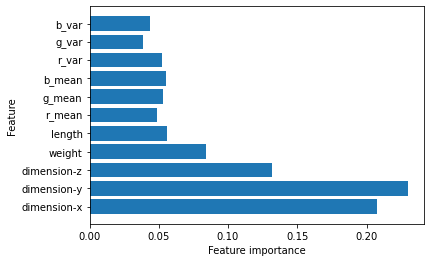

In [26]:
# display bar charts for forest
plot_feature_importances(forest) 

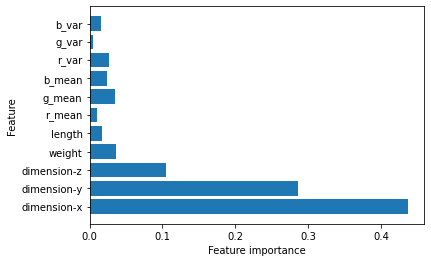

In [27]:
# display bar charts gradient boosting
plot_feature_importances(gbrt) 

### Comment Section 
No, they gave different importances for different features, Gradien boosting is almost neglecting all features except for three: the dimensions x, y and z, while random forest is giving relatively more importance to other features ( like weight) in comparison to gbrt, but still the most important features are dimensions. The main diference is that the most important dimension for random forest classifier is dimension y and for gradient boosting it is x dimension. Although for random forest the difference between the most important feature and the second one is small. 

#### coefficient plot for Logistic Regression

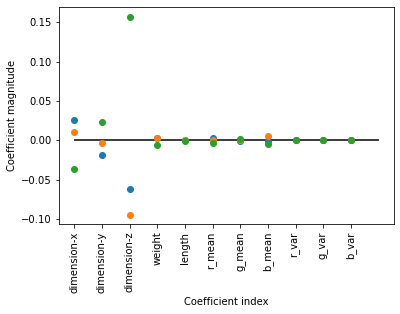

In [28]:
# coefficient plot for Logistic Regression
best_hyper=list(lr1best_parameter.values())[0]
#print(best_hyper)
lr = LogisticRegression(C=best_hyper , max_iter=10000, random_state=0).fit(X_train, y_train)
plt.plot(lr.coef_.T, 'o' )
plt.xticks(range(len(columns)-1),columns, rotation=90)
plt.hlines(0, 0, len(columns)-1)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

In [29]:
print(lr.coef_.shape)

(3, 11)


# B. Classification with Text Data

## Task 1

 Load the files (cover train.csv and cover test.csv). Assign the labels in the train dataset to
“y train”. Assign the labels in the test dataset to “y test”. Combine the content of the columns ‘title‘
and ‘description‘ and assign the combined contents of the train data to “X train” and test data to
“X test” respectively.

In [30]:
#loading the dataset
books_train = pd.read_csv("cover_train.csv")
books_test = pd.read_csv("cover_test.csv")

In [31]:
#code form the discussion board
books_train['alltext'] =  books_train['title'] + ' ' + books_train['description']
books_test['alltext'] =  books_test['title'] + ' ' + books_test['description']

In [32]:
y_train = np.array(books_train.label)
X_train = np.array(books_train.alltext)
#and we do the sme for the test set 
y_test= np.array(books_test.label)
X_test = np.asarray(books_test.alltext)

## Task 2

Transform your data to a Bag-of-Words representation. Rescale your data using TD-IDF

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# transforming it into bag-of-words representation 
vectorizer1 = CountVectorizer()
X_count_vect = vectorizer1.fit_transform(X_train)

#rescaling using td-idf
tdidf = TfidfTransformer()
X_train_tf = tdidf.fit_transform(X_count_vect)

#rescaling test data using td-idf
X_count_vect_test = vectorizer1.transform(X_test)
X_test_tf = tdidf.transform(X_count_vect_test)

## Task 3

Using the output of Question B.2, train a classifier of your choice. Compute the accuracy,
weighted F1-score and confusion matrix on the train and test set.


In [34]:
print(X_train_tf.shape)
print(y_train.shape)

(4951, 27123)
(4951,)


In [35]:
from sklearn.naive_bayes import MultinomialNB
bayes = MultinomialNB().fit(X_train_tf, y_train)
NBscore=bayes.score(X_test_tf, y_test)
print(NBscore)

pred_bayes_test = bayes.predict(X_test_tf)
#accuracy and weighted F1-score
bayes1_f1_test=f1_score(y_test ,pred_bayes_test, average="weighted")
print("F1 score: {}\n".format(bayes1_f1_test))

#confusion matrix
confusion = confusion_matrix(y_test, pred_bayes_test)
print("Confusion matrix train set:\n{}".format(confusion))

0.88
F1 score: 0.876405525050937

Confusion matrix train set:
[[398  25 166]
 [  7 607  20]
 [  7   3 667]]


In [36]:
pred_bayes_train = bayes.predict(X_train_tf)
#accuracy and weighted F1-score
bayes1_f1_train=f1_score(y_train,pred_bayes_train, average="weighted")
print("F1 score: {}\n".format(bayes1_f1_train))

#confusion matrix
confusion = confusion_matrix(y_train, pred_bayes_train)
print("Confusion matrix train set:\n{}".format(confusion))

F1 score: 0.9701673321113631

Confusion matrix train set:
[[1334   23   92]
 [   5 1649   19]
 [   4    4 1821]]


# C. Classification with Image Data


## Task 1

Load the files of book cover images (cover train.npz and cover test.npz). Assign “X” and “y” in the train dataset to “X train” and “y train”. Assign “X” and “y” in the train dataset to “X test” and “y test”. Display an image from each label.

In [37]:
#loading the dataset
cover_train_img = np.load('cover_train.npz')
lst = cover_train_img.files
X_train=cover_train_img["X"]
y_train=cover_train_img["y"]


cover_test_img=np.load('cover_test.npz')
X_test=cover_test_img["X"]
y_test=cover_test_img["y"]
print(X_train.shape)

(4951, 7500)


In [38]:
#mking list of different different cover's labels for training dataset 
label1=[]
label2=[]
label3=[]

i=0
while i <len(y_train):
    if y_train[i]==1:
        label1.append(i)
    if y_train[i]==2:
        label2.append(i)
    if y_train[i]==3:
        label3.append(i)
    i+=1

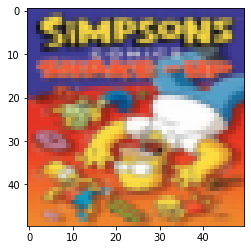

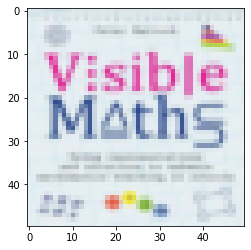

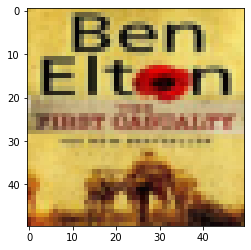

In [39]:
#Display an image from each label for train
label_1=np.reshape(X_train[label1[0]], (50,50,3))
plt.imshow(label_1)
plt.show()

label_2=np.reshape(X_train[label2[0]], (50,50,3))
plt.imshow(label_2)
plt.show()

label_3=np.reshape(X_train[label3[0]], (50,50,3))
plt.imshow(label_3)
plt.show()

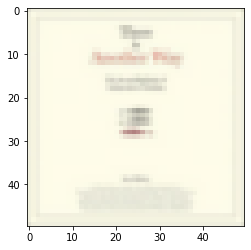

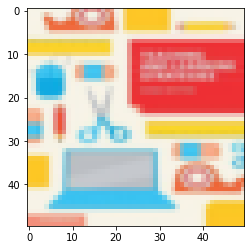

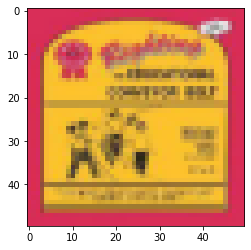

In [40]:

#mking list of different different cover's labels for test dataset 
label1_t=[]
label2_t=[]
label3_t=[]

i=0
while i <len(y_test):
    if y_test[i]==1:
        label1_t.append(i)
    if y_test[i]==2:
        label2_t.append(i)
    if y_test[i]==3:
        label3_t.append(i)
    i+=1

#Display an image from each label for test 
label_1t=np.reshape(X_test[label1_t[0]], (50,50,3))
plt.imshow(label_1t)
plt.show()

label_2t=np.reshape(X_test[label2_t[0]], (50,50,3))
plt.imshow(label_2t)
plt.show()

label_3t=np.reshape(X_test[label3_t[0]], (50,50,3))
plt.imshow(label_3t)
plt.show()

## Task 2

Run a PCA algorithm on the dataset.

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=550).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))
print('explained variance ratio: %s' % str(sum(pca.explained_variance_ratio_)))

X_train_pca.shape: (4951, 550)
explained variance ratio: 0.9546529962729638


## Task 3

Using the output of Question C.2, train a classifier of your choice and evaluate the accuracy,
weighted F1-score and confusion matrix on the train and test set.

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

svmbest_parameter={"C":0, "gamma":0}
svmscore=0
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
for C in [0.1, 1, 10, 100]:
    for gamma in [0.1,1,10]:
        svm=SVC(kernel='rbf', C=C, gamma=gamma)
        svm.fit(X_train_pca, y_train)
        score=svm.score(X_test_pca, y_test)
        if score>svmscore:
            svmscore=score
            svmbest_parameter["C"]=C
            svmbest_parameter["gamma"]=gamma        
        #print("Test set accuracy: {} for C={}, gamma={} ".format(score,C, gamma ))
        #print(svmbest_parameter)


In [43]:
svm=SVC(kernel='rbf', C=svmbest_parameter["C"], gamma=svmbest_parameter["gamma"])
svm.fit(X_train_pca, y_train)
svm_cross_score=max(cross_val_score(svm, X_test_pca, y_test, cv=kfold))
print("Best cross-validation score: {} for C={}, gamma={}".format(svm_cross_score,C, gamma))

Best cross-validation score: 0.6710526315789473 for C=100, gamma=10


In [44]:
#for test sets
pred_svm_test = svm.predict(X_test_pca)
#accuracy and weighted F1-score
svm_f1_test=f1_score(y_test,pred_svm_test, average="weighted")
print("F1 score: {}\n".format(f1_score(y_test,pred_svm_test, average="weighted")))
#confusion matrix
confusion = confusion_matrix(y_test, pred_svm_test)
print("Confusion matrix train set:\n{}".format(confusion))

F1 score: 0.5177760465553751

Confusion matrix train set:
[[   0    1  250]
 [   0    1  402]
 [   0   12 1234]]


In [45]:
# for train sets
pred_svm_train = svm.predict(X_train_pca)
#accuracy and weighted F1-score
svm_f1_train=f1_score(y_train,pred_svm_train, average="weighted")
print("F1 score: {}\n".format(f1_score(y_train,pred_svm_train, average="weighted")))
#confusion matrix
confusion = confusion_matrix(y_train, pred_svm_train)
print("Confusion matrix train set:\n{}".format(confusion))

F1 score: 0.2438550605030167

Confusion matrix train set:
[[   0    7 1442]
 [   0  109 1564]
 [   0    1 1828]]


###### few previous blocks were a manual attempt to find the best hyperparameters and to tune the SVM casiffier because when trying to run the cell below, which was the initial solution to this task, my laptop just keep running for 6hours without any output

In [46]:
#svm=SVC(kernel='rbf')
#Cs=[0.01, 0.1, 1, 10, 100]
#gammas=[0.1,1,10]
#param_grid = {"C": Cs}
#param_grid = {"C": Cs, "gamma": gammas}
#grid_search = GridSearchCV(svm, param_grid, cv=kfold)
#grid_search.fit(X_train, y_train)
#svmbest_parameter=grid_search.best_params_
#print("Best parameters: {}".format(grid_search.best_params_))
#Accuracy score?
#svmscore=grid_search.best_score_
#print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# D. Summary table and good coding standards

## Task 1

Please include a summary table of all your results in a csv file. The table should include the
algorithm used, the data used, the hyperparameter, accuracy and weighted f1 score. You can create this
table automatically or by manually

In [47]:
datasets=[]
# list of names of all teh models used in the assigment
model_names = ["Linear Regression", "DecisionTreeClassifier", "MLPClassifier", "RandomForestClassifier", "GradientBoostingClassifier", "MultinomialNB", "SVMClassifier"]
#since some models were trained on the same datasets I wanted to make the list of the datasets names in an optimal way
for i in range(5):
    datasets.append("cover_numerical")
datasets.append("cover_text")
datasets.append("cover_img")
#names of the best parameters of all models 
parameters = [lr1best_parameter, tree1best_parameter, MLP1best_parameter, forest1best_parameter, gradient1best_parameter, "no parameters", svmbest_parameter ]
#the best scores 
scores=[lr1score, tree1score, MLP1score, forest1score, gradient1score, NBscore , svm_cross_score]
#best test scores 
f1_test=[lr1_f1_test, tree1_f1_test, mlp1_f1_test, forest1_f1_test, gradient1_f1_test, bayes1_f1_test, svm_f1_test]
#best train scores
f1_train=[lr1_f1_train, tree1_f1_train, mlp1_f1_train, forest1_f1_train, gradient1_f1_train, bayes1_f1_train, svm_f1_train]
#creating a dictionary with all the model names, parameters, accuracy scoresa and f1 scores
dictionary={"datasets":datasets, "models":model_names,"parameters": parameters, "scores":scores, "f1_test scores":f1_test, "f1_train":f1_train}
#converting the dictionary into a dataframe
data_frame = pd.DataFrame(dictionary)
#converting a data frame into a csv file 
data_frame.to_csv("Summary.csv", index = False)

# E. Additional solutions to improve your weighted F1-score

### Implement an additional solutions to improve your weighted F1-score. These solutions can include (but are not limited) to the following:
- trying different hyper-parameters for text classification (e.g. setting stop words to english, different values for min df and different ngram range values) (max 5 points)
- using a Voting or Stacking classifier to combine the best classifiers from Part A, B and/or C (max 5 points)

#### setting stop words to english

In [48]:
# assigning X_train and test again since we dealt with different dataset in previous block 
#so we have to define X_train for text data again
y_train = np.array(books_train.label)
X_train = np.array(books_train.alltext)
#and we do the sme for the test set 
y_test= np.array(books_test.label)
X_test = np.asarray(books_test.alltext)

##### fitting and transformint train data again with different sparameters for vectorizer and also transforming the test data

In [49]:
param={"stop_words":'english',"MultinomialNB":"no parameters"}
vectorizer_stop = CountVectorizer(stop_words='english')
X_count_vect_sw = vectorizer_stop.fit_transform(X_train)

tdidf2 = TfidfTransformer()
X_train_tf_stop = tdidf2.fit_transform(X_count_vect_sw)

X_count_vect_test_stop = vectorizer_stop.transform(X_test)
X_test_tf_stop = tdidf2.transform(X_count_vect_test_stop)

In [50]:
bayes2 = MultinomialNB().fit(X_train_tf_stop, y_train)
NBscore2=bayes2.score(X_test_tf_stop, y_test)
print(NBscore2)

0.8994736842105263


In [51]:
pred_bayes2_test = bayes2.predict(X_test_tf_stop)
#accuracy and weighted F1-score
bayes2f1_test=f1_score(y_test ,pred_bayes2_test, average="weighted")
print("F1 score: {}\n".format(bayes2f1_test))

F1 score: 0.8976094749405982



In [52]:
# F1 for train data
pred_bayes2_train = bayes2.predict(X_train_tf_stop)
#accuracy and weighted F1-score
bayes2f1_train=f1_score(y_train ,pred_bayes2_train, average="weighted")
print("F1 train score: {}\n".format(bayes2f1_train))

F1 train score: 0.9775274122445125



####  different values for min df

In [53]:
param2={"min_df":2,"MultinomialNB":"no parameters"}
vectorizer_min_df = CountVectorizer(min_df=2)
X_count_min_dif = vectorizer_min_df.fit_transform(X_train)

tdidf3 = TfidfTransformer()
X_train_min_df = tdidf3.fit_transform(X_count_min_dif)

X_count_vect_test_min_df = vectorizer_min_df.transform(X_test)
X_test_tf_min_df = tdidf3.transform(X_count_vect_test_min_df)

In [54]:
bayes3 = MultinomialNB().fit(X_train_min_df, y_train)
NBscore3=bayes3.score(X_test_tf_min_df, y_test)
print(NBscore3)

0.8957894736842106


In [55]:
# F1 for train data
pred_bayes3_train = bayes3.predict(X_train_min_df)
#accuracy and weighted F1-score
bayes3f1_train=f1_score(y_train ,pred_bayes3_train, average="weighted")
print("F1 train score: {}\n".format(bayes3f1_train))

F1 train score: 0.9690074694758095



In [56]:
# F1 for test data
pred_bayes3_test = bayes3.predict(X_test_tf_min_df)
#accuracy and weighted F1-score
bayes3f1_test=f1_score(y_test ,pred_bayes3_test, average="weighted")
print("F1 test score: {}\n".format(bayes3f1_test))

F1 test score: 0.8938703375333478



#### different ngram range values

In [57]:
param3={"ngram_range":(2, 2), "MultinomialNB":"no parameters"}
cv2 = CountVectorizer(ngram_range=(2, 2))
X_count_ngram_range = cv2.fit_transform(X_train)

tdidf4 = TfidfTransformer()
X_train_ngram_range = tdidf4.fit_transform(X_count_ngram_range)

X_count_vect_test_ngram_range = cv2.transform(X_test.ravel())
X_test_tf_ngram_range = tdidf4.transform(X_count_vect_test_ngram_range)

In [58]:
bayes4 = MultinomialNB().fit(X_train_ngram_range, y_train)
NBscore4=bayes4.score(X_test_tf_ngram_range, y_test)
print(NBscore4)

0.8257894736842105


In [59]:
pred_bayes4_test = bayes4.predict(X_test_tf_ngram_range)
#accuracy and weighted F1-score
bayes4f1_test=f1_score(y_test,pred_bayes4_test, average="weighted")
print("F1 score: {}\n".format(bayes4f1_test))

F1 score: 0.8128139304610346



In [60]:
# F1 for train data
pred_bayes4_train = bayes4.predict(X_train_ngram_range)
#accuracy and weighted F1-score
bayes4f1_train=f1_score(y_train,pred_bayes4_train, average="weighted")
print("F1 train score: {}\n".format(bayes4f1_train))

F1 train score: 0.9967677605099456



### Voting / Stacking

In [61]:
#for part A
# assigning X_train and test again since we dealt with different dataset in previous block 
#so we have to define X_train for numerical data again
columns = np.array(list(cover_train_numerical.columns)) # array with column names
X_train = cover_train_numerical[columns[:-1]]
y_train = cover_train_numerical[columns[-1]]

###creating your target variable
X_test = cover_test_numerical[columns[:-1]]
y_test = cover_test_numerical[columns[-1]]

In [62]:
from sklearn.ensemble import VotingClassifier

model1=GradientBoostingClassifier(n_estimators=list(gradient1best_parameter.values())[0], random_state=0)
model2=RandomForestClassifier(n_estimators=list(forest1best_parameter.values())[0], random_state=0)
estimators = [('gradient', model1), ('forest', model2)]
model = VotingClassifier(estimators=estimators, voting='hard')
model.fit(X_train,y_train)
voting_score= model.score(X_test,y_test)
print("Voting Test score: ",voting_score)


Voting Test score:  0.82


In [63]:
pred_voting = model.predict(X_test)
#accuracy and weighted F1-score
voting_f1_score=f1_score(y_test,pred_voting, average="weighted")
print("F1 test score: {}\n".format(voting_f1_score))

F1 test score: 0.820978245491954



In [64]:
pred_voting_train = model.predict(X_train)
#accuracy and weighted F1-score
voting_f1_score_train=f1_score(y_train,pred_voting_train, average="weighted")
print("F1 train score: {}\n".format(voting_f1_score_train))

F1 train score: 0.9548425641022662



In [65]:
from sklearn.ensemble import StackingClassifier

final_estimator=DecisionTreeClassifier(max_depth=list(tree1best_parameter.values())[0], random_state=0)
sclf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
sclf.fit(X_train, y_train)
stacking_score=sclf.score(X_test,y_test)
print("Stacking Test score: ", stacking_score)

paramaters_for_summary={"estimators":estimators,"final_estimator":final_estimator}
print(paramaters_for_summary)

Stacking Test score:  0.7873684210526316
{'estimators': [('gradient', GradientBoostingClassifier(random_state=0)), ('forest', RandomForestClassifier(random_state=0))], 'final_estimator': DecisionTreeClassifier(max_depth=10, random_state=0)}


In [66]:
pred_stacking = model.predict(X_test)
#accuracy and weighted F1-score
stacking_f1_score=f1_score(y_test,pred_stacking, average="weighted")
print("F1 test score: {}\n".format(stacking_f1_score))

F1 test score: 0.820978245491954



In [67]:
pred_stacking_train = model.predict(X_train)
#accuracy and weighted F1-score
stacking_f1_score_train=f1_score(y_train,pred_stacking_train, average="weighted")
print("F1 train score: {}\n".format(stacking_f1_score_train))

F1 train score: 0.9548425641022662



## Making an updated summary of all scores 

In [68]:
model_names+=["stop_words", "different values for min df", "different ngram range values", "voting", "stacking"]
for i in range(3):
    datasets.append("cover_text")
datasets.append("cover_num")
datasets.append("cover_num")
parameters+=[param,param2,param3, estimators, paramaters_for_summary]
scores+=[NBscore2, NBscore3, NBscore4,voting_score,stacking_score]
f1_test+=[bayes2f1_test, bayes3f1_test,bayes4f1_test, voting_f1_score, stacking_f1_score]
f1_train+=[bayes2f1_train, bayes3f1_train, bayes4f1_train,voting_f1_score_train, stacking_f1_score_train]
dictionary={"datasets":datasets, "models":model_names,"parameters": parameters, "scores":scores, "f1_test scores":f1_test, "f1_train":f1_train}
data_frame = pd.DataFrame(dictionary)
data_frame.to_csv("Summary_updated.csv", index = False)

